In [7]:
import numpy as np
from scipy.optimize import linear_sum_assignment
from scipy.spatial import distance

def pair_coordinates(set_a, set_b, radius):
    """Find optimal unique pairing between two sets of coordinates.

    This function uses the Munkres or Kuhn-Munkres algorithm behind the
    scene to find the most optimal unique pairing when pairing points in
    set B against points in set A, using euclidean distance as the cost
    function.

    Args:
        set_a (ndarray):
            An array of shape Nx2 contains the of XY coordinate of N
            different points.
        set_b (ndarray):
            An array of shape Mx2 contains the of XY coordinate of M
            different points.
        radius:
            Valid area around a point in set A to consider a given
            coordinate in set B a candidate for matching.

    Returns:
        tuple:
            - :class:`numpy.ndarray` - Pairing:
                An array of shape Kx2, each item in K contains indices
                where point at index [0] in set A paired with point in
                set B at index [1].
            - :class:`numpy.ndarray` - Unpaired A:
                Indices of unpaired points in set A.
            - :class:`numpy.ndarray` - Unpaired B:
                Indices of unpaired points in set B.

    """
    # * Euclidean distance as the cost matrix
    pair_distance = distance.cdist(set_a, set_b, metric="euclidean")

    # * Munkres pairing with scipy library
    # The algorithm return (row indices, matched column indices) if
    # there is multiple same cost in a row, index of first occurrence is
    # return, thus the unique pairing is ensured.
    indices_a, paired_indices_b = linear_sum_assignment(pair_distance)

    # Extract the paired cost and remove instances outside of designated
    # radius.
    pair_cost = pair_distance[indices_a, paired_indices_b]

    paired_a = indices_a[pair_cost <= radius]
    paired_b = paired_indices_b[pair_cost <= radius]

    pairing = np.concatenate([paired_a[:, None], paired_b[:, None]], axis=-1)
    unpaired_a = np.delete(np.arange(set_a.shape[0]), paired_a)
    unpaired_b = np.delete(np.arange(set_b.shape[0]), paired_b)
    return pairing, unpaired_a, unpaired_b



def f1_detection(true, pred, radius):
    """Calculate the F1-score for predicted set of coordinates."""
    (paired_true, unpaired_true, unpaired_pred) = pair_coordinates(true, pred, radius)

    tp = len(paired_true)
    fp = len(unpaired_pred)
    fn = len(unpaired_true)
    return tp / (tp + 0.5 * fp + 0.5 * fn)

In [80]:
import cv2
img=cv2.imread("/content/drive/MyDrive/Colab Notebooks/Image-Segmentation-Score/data/441.png",0)
img2=cv2.imread("/content/drive/MyDrive/Colab Notebooks/Image-Segmentation-Score/data/441_true.png",0)
f1_detection(img,img2,100)

0.467

In [81]:
import numpy as np
from sklearn.metrics import f1_score
f1_score(img, img2, average='micro')

0.8507811136928219

In [82]:
def find_tf_tp_fn(a,b):
  tp=0
  fp=0
  fn=0
  for i,value in enumerate(a):
    for j,set_a in enumerate(value):
      #print(set_a)
      set_b=b[i][j]
      if set_a==255 and set_b==255:
        tp+=1
      elif set_a==255 and set_b==0:
        fp+=1
      elif set_a==0 and set_b==255:
        fn+=1

  return tp / (tp + 0.5 * fp + 0.5 * fn)

print(find_tf_tp_fn(img, img2))

0.8507811136928219


0.6133333333333333


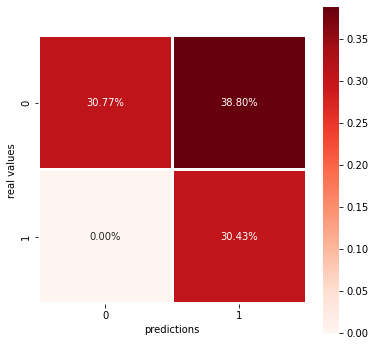

In [66]:
import seaborn as sns
import numpy as np
import cv2
import matplotlib.pyplot as plt


total=[]

Y_pred = cv2.imread('/content/drive/MyDrive/Colab Notebooks/keras_segmentation/Result/vgg_unet/133687576_48331.png')
Y_val = cv2.imread('/content/drive/MyDrive/Colab Notebooks/keras_segmentation/Result/test/133687576_48331.png')

FP = len(np.where(Y_pred - Y_val  == -1)[0])
FN = len(np.where(Y_pred - Y_val  == 1)[0])
TP = len(np.where(Y_pred + Y_val ==2)[0])
TN = len(np.where(Y_pred + Y_val == 0)[0])
cmat = [[TP, FN], [FP, TN]]
f1=(2*TP)/((2*TP)+FP+FN)
print(f1)

total.append(f1)




plt.figure(figsize = (6,6))
sns.heatmap(cmat/np.sum(cmat), cmap="Reds", annot=True, fmt = '.2%', square=1,   linewidth=2.)
plt.xlabel("predictions")
plt.ylabel("real values")
plt.show()